In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving smsspamcollection.tsv to smsspamcollection.tsv
User uploaded file "smsspamcollection.tsv" with length 513887 bytes


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df['message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [ ]:
df['message'].value_counts()

Sorry, I'll call later                                                                                                                                                                                                                                                                                   30
I cant pick the phone right now. Pls send a message                                                                                                                                                                                                                                                      12
Ok...                                                                                                                                                                                                                                                                                                    10
Ok.                                                                                                 

In [ ]:
#df['length']
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

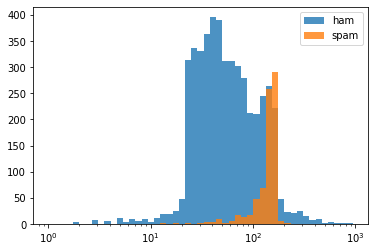

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [5]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

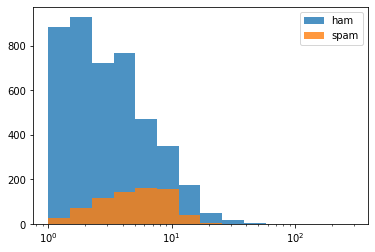

In [6]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [7]:
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

In [8]:
X

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2
...,...,...
5567,160,8
5568,36,1
5569,57,7
5570,125,1


In [9]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3900, 2)
Testing Data Shape:  (1672, 2)


In [11]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
from sklearn import metrics
predictions = lr_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [13]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [14]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [15]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [ ]:
#  ---- Lets boost the accuracy using featuer extraction of NLP in the sampe dataset using CountVectorizer, TfidfTransformer and nlp pipeline.

In [16]:
df_1 = pd.read_csv('smsspamcollection.tsv', sep='\t')
df_1.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [17]:
df_1 = df_1.rename({ 'message' : 'Mes' } , axis=1) 

In [18]:
df_1

,label,Mes,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [19]:
from sklearn.model_selection import train_test_split

X = df_1['Mes']
y = df_1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Mes, Length: 5572, dtype: object

In [21]:
X_train.shape

(3900,)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_counts =count_vect.fit_transform(X_train)

In [23]:
X_train_counts.shape

(3900, 7263)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf =tfidf_transformer.fit_transform(X_train_counts)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer= TfidfVectorizer()
X_train_vector = Vectorizer.fit_transform(X_train)

In [30]:
X_train_vector.shape

(3900, 7263)

In [25]:
X_train_tfidf.shape

(3900, 7263)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [32]:
predictions = text_clf.predict(X_test)

In [39]:
text_clf.score(X_test , y_test )

0.9712918660287081

In [33]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [34]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1446    2]
 [  46  178]]


In [35]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [36]:
print(metrics.accuracy_score(y_test,predictions))

0.9712918660287081
